In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import sys
import os

data_path = '/content/drive/My Drive/DataFest-2022-Materials/data files/' 

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df_full = pd.read_csv(data_path+'logs.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
p1 = df_full[df_full['player_id']==6607011]

In [53]:
p1['event_time_dbl']

1917641       73
1917642       74
1917643       75
1917644       79
1917645       94
           ...  
1927937    25336
1927938    25338
1927939    25340
1927940    25340
1927941    25340
Name: event_time_dbl, Length: 10301, dtype: int64

In [40]:
stack_events = {200:'enter stack',203:'complete stack',204:'exit stack'}

In [78]:
stack_relev = p1[(p1['event_id'] == 200) | (p1['event_id'] == 203) | (p1['event_id'] == 204) | (p1['event_id']==1)|(p1['event_id']==101)|(p1['event_id']==1002)]

In [58]:
stack_relev.sort_values(by = 'event_time_dbl', ascending = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [80]:
stack_relev[['event_id','event_description','stack_id','event_time_dbl']]

,event_id,event_description,stack_id,event_time_dbl
1917991,203,Player completes Stack,12.0,1230
1917995,200,Player enters Stack,0.0,1246
1918442,204,Player exits Stack,0.0,2316
1918446,1,Player ends session,NaN,2335
1918450,200,Player enters Stack,0.0,2353
...,...,...,...,...
1927740,203,Player completes Stack,5.0,24913
1927744,200,Player enters Stack,6.0,24926
1927933,1002,Player exits game through top bar back arrow,NaN,25330
1927935,204,Player exits Stack,6.0,25333


In [5]:
def find_stack_flow(player_id, full_log):
  # find the data for this player from the full log data
  df_p = full_log[full_log['player_id']==player_id]

  # find data relevant to stack-related events
  def find_stack_event(df):
    rel = df[(df['event_id'] == 200) | (df['event_id'] == 203) | (df['event_id'] == 204) | (df['event_id']==1)|(df['event_id']==101)|(df['event_id']==1002)]
    rel = rel.sort_values(by = 'event_time_dbl', ascending = True)
    rel = rel[['player_id','date','event_id','event_description','stack_id','stack_title','event_time_dbl',
               'skill_level_know','skill_level_people','skill_level_refusal','skill_level_me']]
    return rel
  
  df_stack = find_stack_event(df_p)

  def find_status(event_id):
    if event_id == 200:
      return 'enter'
    elif event_id in [204, 1, 101, 1002]:
      return 'exit'
    elif event_id == 203:
      return 'complete'
  
  def find_status_dum(event_id):
    if event_id == 200:
      return 0
    elif event_id in [204, 1, 101, 1002, 203]:
      return 1
  
  df_stack['status'] = df_stack['event_id'].apply(find_status)
  df_stack['status_dum'] = df_stack['event_id'].apply(find_status_dum)

  # drop multiple exits and keep the first one
  index_to_drop = []
  for i in range(1,len(df_stack)):
    if df_stack['status'].iloc[i] == 'exit' and df_stack['status'].iloc[i-1] == 'exit':
      index_to_drop.append(i)
    if pd.isna(df_stack['stack_id'].iloc[i]):
      df_stack['stack_id'].iloc[i] = df_stack['stack_id'].iloc[i-1]

  df_stack = df_stack.drop(df_stack.index[index_to_drop])
  return df_stack

In [164]:
os.getcwd()
test1 = find_stack_flow(6427037, df_full)
#test1.to_csv('/content/drive/My Drive/DataFest 2022/test1.csv')
test1[['event_id','event_description','stack_id','status','status_dum']]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,event_id,event_description,stack_id,status,status_dum
366001,203,Player completes Stack,12.0,complete,1
366005,200,Player enters Stack,0.0,enter,0
366236,1002,Player exits game through top bar back arrow,0.0,exit,1
366504,200,Player enters Stack,0.0,enter,0
366597,204,Player exits Stack,0.0,exit,1
366605,200,Player enters Stack,0.0,enter,0
367036,1002,Player exits game through top bar back arrow,0.0,exit,1
367049,200,Player enters Stack,0.0,enter,0
367118,1002,Player exits game through top bar back arrow,0.0,exit,1
368680,203,Player completes Stack,0.0,complete,1


In [21]:
def plot_stack_flow(player_id, full_log):
  test1 = find_stack_flow(player_id, full_log)
  test1 = test1[test1['stack_id']!=12]
  complete_stacks = test1[test1['status']=='complete']
  enter_stacks = test1[test1['status']=='enter']
  plt.figure(figsize = (12, 6))
  plt.plot(test1['event_time_dbl'],test1['stack_id'], color = 'blue')
  plt.scatter(complete_stacks['event_time_dbl'],complete_stacks['stack_id'], color = 'red', label = 'complete points')
  plt.scatter(enter_stacks['event_time_dbl'],enter_stacks['stack_id'], color = 'yellow', label = 'enter points')
  plt.xlabel("time elapsed")
  plt.ylabel("stack number")
  plt.legend()
  plt.yticks(np.arange(0, 12, 1.0))
  plt.title("Stack Flow of player "+str(player_id))
  plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


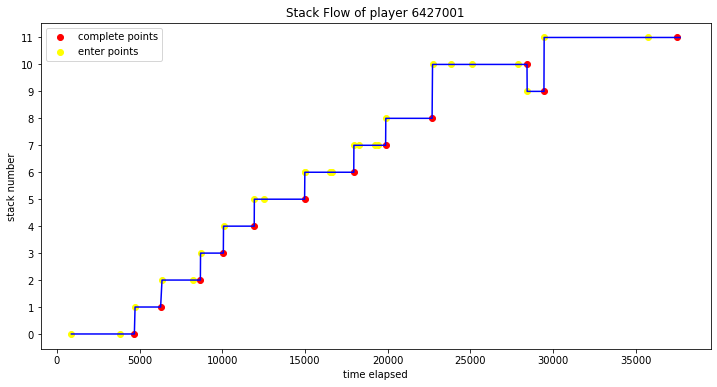

In [22]:
plot_stack_flow(6427001, df_full)

In [ ]:
p1[(p1['event_time_dbl']>=2353)&(p1['event_time_dbl']<=3354)][['event_id','event_description']]['event_description']]

In [ ]:
test2 = find_stack_flow(6427031, df_full)
test2

In [ ]:
df_full[df_full['stack_id']==11]

In [165]:
def generate_stack_data(stack_flow):
  # remove stack 12 the tutorial
  s_flow = stack_flow[stack_flow['stack_id']!=12]

  # get all the stacks this player played, by time order
  stack_id_list = s_flow[s_flow['status']=='enter'].unique()

  # initialize dictionary
  stack_time = {}
  for i in stack_id_list:
    stack_time[i] = 0
    
  for i in range(len(s_flow)):
    status = s_flow['status'].iloc[i]
    time_elapsed = s_flow['event_time_dbl']
    if 
    

,player_id,date,event_id,event_description,stack_id,stack_title,event_time_dbl,skill_level_know,skill_level_people,skill_level_refusal,skill_level_me,status,status_dum
366001,6427037,1969-12-31,203,Player completes Stack,12.0,Welcome to PlayForward,921,NaN,NaN,NaN,NaN,complete,1
366005,6427037,1969-12-31,200,Player enters Stack,0.0,"Make the Grade, Make A Friend",1167,0.0,0.0,0.0,6.0,enter,0
366236,6427037,1969-12-31,1002,Player exits game through top bar back arrow,0.0,NaN,1991,NaN,NaN,NaN,NaN,exit,1
366504,6427037,1969-12-31,200,Player enters Stack,0.0,"Make the Grade, Make A Friend",2628,0.0,3.0,0.0,6.0,enter,0
366597,6427037,1969-12-31,204,Player exits Stack,0.0,"Make the Grade, Make A Friend",2981,NaN,NaN,NaN,NaN,exit,1
366605,6427037,1969-12-31,200,Player enters Stack,0.0,"Make the Grade, Make A Friend",3032,0.0,3.0,0.0,6.0,enter,0
367036,6427037,1969-12-31,1002,Player exits game through top bar back arrow,0.0,NaN,4042,NaN,NaN,NaN,NaN,exit,1
367049,6427037,2013-10-28,200,Player enters Stack,0.0,"Make the Grade, Make A Friend",4132,0.0,3.0,0.0,6.0,enter,0
367118,6427037,2013-10-28,1002,Player exits game through top bar back arrow,0.0,NaN,4302,NaN,NaN,NaN,NaN,exit,1
368680,6427037,2013-10-28,203,Player completes Stack,0.0,"Make the Grade, Make A Friend",6629,NaN,NaN,NaN,NaN,complete,1
